### \#4

Apply the Shooting Method to the nonlinear BVPs. Find a bracketing interval [s0, s1] and apply an
equation solver to find and plot the solution. $\\$
$\begin{cases} y^{''} = sin(y^{'}) \\ y(0) = 1 \\ y(1) = -1 \end{cases}$

In [3]:
import numpy as np

# Secant method for root finding part of the problem
def secant(f, ini1, ini2, tol=1e-8, max_iter = 100):
    x1 = ini1
    x2 = ini2
    f1 = f(x1)
    for i in range(max_iter):
        f2 = f(x2)
        x_temp = x2
        x2 = x2 - f(x2)*(x2 - x1)/(f2-f1)

        # update history
        x1 = x_temp
        f1 = f2
        if np.abs(x2-x1) < tol:
            break
    return x2, i + 1

# Runga-Kutta method for root finding part of the problem
def RK4(F, x0, t0, T, K):
    dd= x0.size
    tgrid = np.linspace(t0, T, K+1)
    xx = np.zeros((K+1,dd))
    xx[0] = x0

    for k in range(K):
        tau = tgrid[k+1] - tgrid[k]
        x = xx[k]
        t = tgrid[k]

        k1 = F(t,x)
        k2 = F(t, x + tau/2*k1)
        k3 = F(t, x + tau/2*k2)
        k4 = F(t, x + tau*k3)
        xx[k+1] = x + tau/6*(k1 + 2*k2 + 2*k3 + k4)
    return xx, tgrid

In [4]:
import numpy as np
def F_(s, bc1, bc2, slope, a, b, N):

    x0 = np.array([bc1, s])

    sol, tgrid = RK4(slope, x0, a, b, N)

    return sol[-1, 0] - bc2

# problem and numerical settings
N = 100
a, b = 0., 1.
slope = lambda t, x: np.array([x[1], np.sin(x[1])])
bc1 = 1.
bc2 = -1.

# simplified function for root finding
F = lambda s: F_(s, bc1=bc1, bc2=bc2, slope=slope, a=a, b=b, N=N)

0.5295265888873552


In [5]:
# solve the main root finding problem
secant_guess1 = -1.
secant_guess2 = 0.
s_s, iter = secant(F, secant_guess1, secant_guess2)

print(s_s, iter)

# compute the trajectory
sol, tgrid = RK4(slope, np.array([bc1, s_s]), a, b, N)

-1.5308590132830266 7


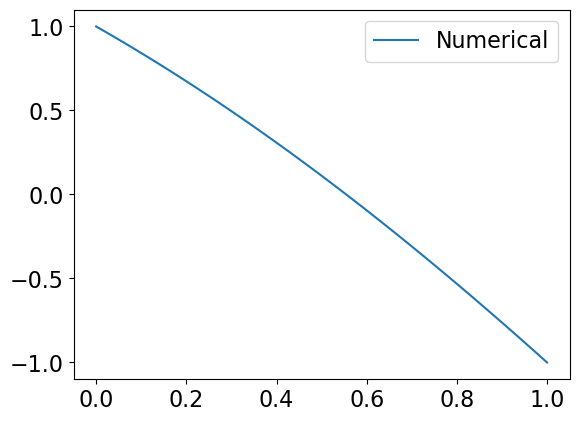

In [6]:
import matplotlib.pyplot as plt

# change the overal font size 
plt.rcParams.update({"font.size": 16})

# create subplots for 3d plots
fig, ax = plt.subplots()

# plot the numerical and true solution
ax.plot(tgrid, sol.T[0])
plt.legend(["Numerical", "True"])
plt.show()

### \#7

(a) Use finite differences to approximate the solution y(t) to the following BVP for n = 9. Plot the
approximate solution together with the exact solution $y = 2/t^2$     
(b) Plot the approximation errors on the interval in a separate semilog plot for n = 9, 19, 39, 79, 159. $\\$
$\begin{cases} y'' = \frac{3}{2}t^2y^3 \\ y(1) = 2 \\ y(2) = \frac{1}{2} \end{cases}$

In [47]:
import numpy as np
def F(w, n, h, a):
    '''
    Inputs: 
    w - vector in R^n
    n - size of the vector 
    h - step size 
    ya - left boundary value
    Output:
    Fw - vector in R^n
    '''
    w = w.reshape(-1,1)
    Fw = np.zeros(n+2).reshape(-1,1)
    for i in range(n):
        if i == 0:
            Fw[i] = w[1] - 2*w[0] + 2 - (3/2)*((a + h*i)**2)*(w[0])**3
        elif i == n-1:
            Fw[i] = (1/2) - 2*w[-1] + w[-2] - (3/2)*((a + h*i)**2)*(w[-1])**3
        else:
            Fw[i] = w[i+1] - 2*w[i] + w[i-1] - (3/2)*((a + h*i)**2)*(w[i])**3
    return Fw

g = F

In [48]:
def Broyden_II(F, x0, n, h, a, B0 = None, tol=1e-6, max_iter=100):
    """
    Solve F(x) = 0 using Broyden's "bad" method.
    
    Shapes
        Input: row vectors
        Internal computation: convert to column vectors
        Output: convert back to row vectors
    """
    n = n
    h = h
    a = a
    x = x0.reshape(-1, 1)
    B = B0 if B0 else np.eye(len(x0))
    for i in range(max_iter):
        Fx = F(x, n, h, a).reshape(-1, 1)
        x_new = x - B @ Fx
        d = x_new - x
        t = F(x_new, n, h, a).reshape(-1, 1) - Fx
        B += ((d - B @ t) @ d.T @ B) / (d.T @ B @ t)
        x = x_new
        if np.linalg.norm(F(x, n, h, a)) < tol:
            break
    return x.reshape(-1,), i+1

In [49]:
from scipy.linalg import toeplitz

# defining y''
#f = lambda t, y: (3/2)(t*t)(y*y*y)

# define boundary conditions
a = 1
b = 2
ya = 2
yb = 1/2

# grid resolution/spacing
n = 9
h = (b - a) / (n + 1)

# grid domain
t = np.linspace(a, b, n+2)

# Initialize the solution array
w = np.zeros(n+2)

# Apply the boundary conditions
w[0] = ya
w[-1] = yb

'''
Since the Jacobian for F would be extremely difficult to obtain, we'll use the Broyden 2 method using
the identity matrix as our B0
'''
x0 = np.zeros(n+2)

sol, iter = Broyden_II(g, x0, n, h, a)
print(sol)

[nan nan nan nan nan nan nan nan nan nan nan]


/var/folders/yr/2pln9r_90574qjgzrqbwvrsr0000gn/T/ipykernel_24799/274201654.py:20: RuntimeWarning: overflow encountered in power
  Fw[i] = w[i+1] - 2*w[i] + w[i-1] - (3/2)*((a + h*i)**2)*(w[i])**3
/var/folders/yr/2pln9r_90574qjgzrqbwvrsr0000gn/T/ipykernel_24799/3041269999.py:20: RuntimeWarning: invalid value encountered in matmul
  B += ((d - B @ t) @ d.T @ B) / (d.T @ B @ t)


ValueError: x and y must have same first dimension, but have shapes (11,) and (9,)

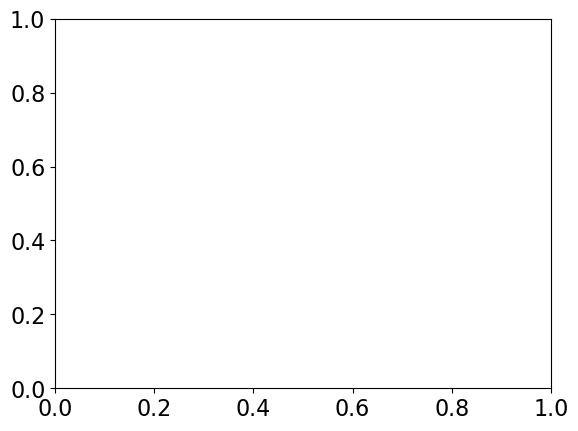

In [45]:
import matplotlib.pyplot as plt

# change the overal font size 
plt.rcParams.update({"font.size": 16})

# create subplots for 3d plots
fig, ax = plt.subplots()

# plot the numerical and true solution
ax.plot(t, sol, label="FDM")
plt.legend()
plt.show()

### \#8

Apply the FDM to the nonlinear BVPs. Compare the numerical solution with the one obtained from
shooting method (Problem 4) $\\$
$\begin{cases} y'' = \text{sin} \ y' \\ y(0) = 1 \\ y(1) = -1 \end{cases}$